In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Drawing Key Points on Image

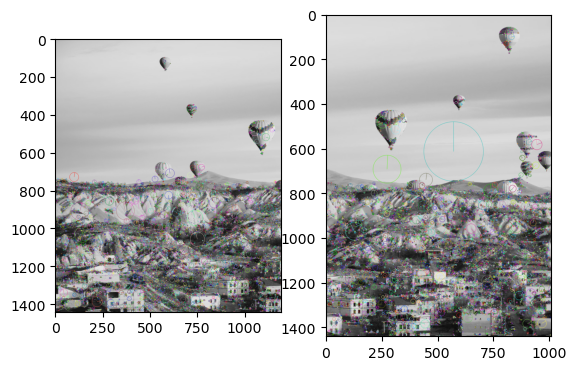

In [2]:
img1 = cv2.imread(r'panorama_1.jpg')
img2 = cv2.imread(r'panorama_2.jpg')
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) # converting images to greyscale, detecting corners in greyscale image
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1 = sift.detect(gray1,None) # detecting interest points (by detecting scale of corner and orientation)
kp2 = sift.detect(gray2,None)
img_1 = cv2.drawKeypoints(gray1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_2 = cv2.drawKeypoints(gray2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121)
plt.imshow(img_1[:,:,::-1]) # converting from BGR to RGB
plt.subplot(122)
plt.imshow(img_2[:,:,::-1])

# Matching Key Points Between Two Images using SIFT descriptors

In [38]:
img1 = cv2.imread(r'panorama_1.jpg')
img2 = cv2.imread(r'panorama_2.jpg')
sift = cv2.SIFT_create()
kp1 , des1 = sift.detectAndCompute(img1,None)
kp2 , des2 = sift.detectAndCompute(img2,None)

In [24]:
des1.shape # key points, length of descriptor

(10686, 128)

In [26]:
des2.shape

(9117, 128)

In [28]:
bf = cv2.BFMatcher(cv2.NORM_L2,crossCheck=True)
matches = bf.match(des1,des2)

In [10]:
matches = sorted(matches,key=lambda x:x.distance) # picking the top matches

In [14]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],img2,flags=2) # drawing top 20 matches

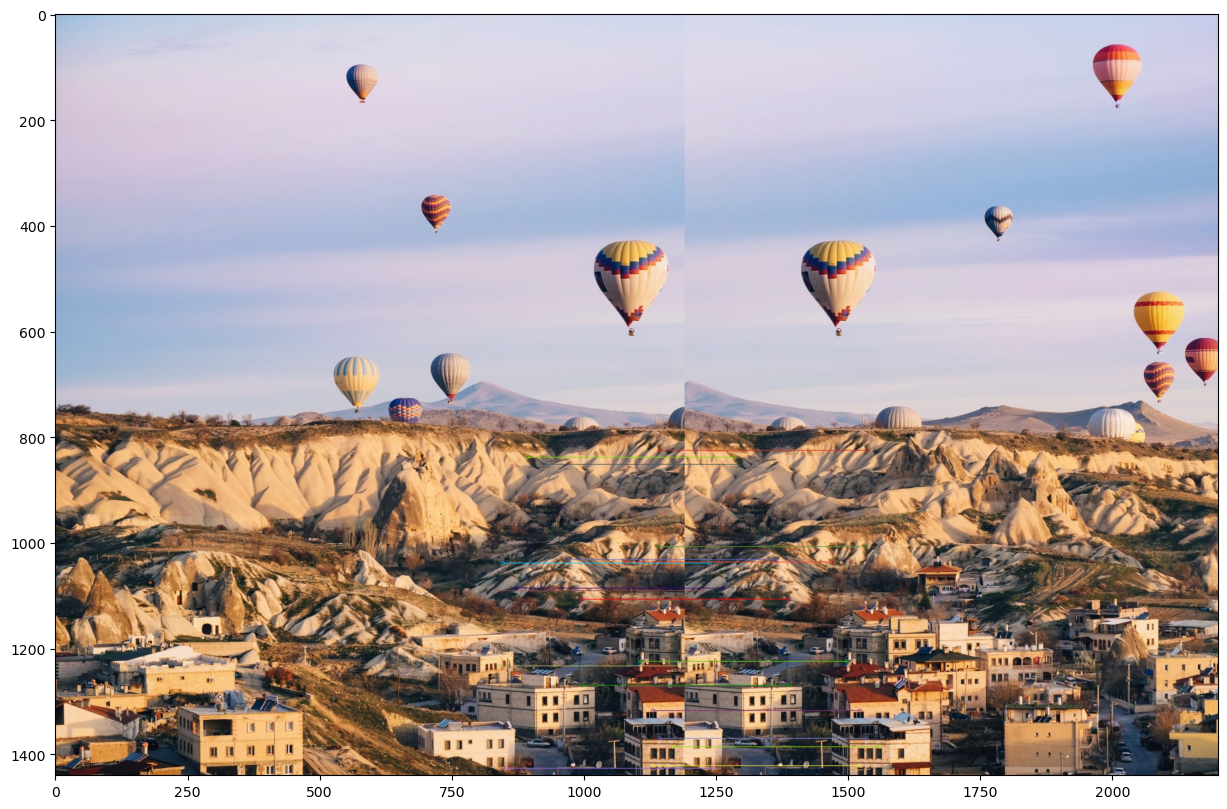

In [16]:
plt.figure(figsize=(15,20))
plt.imshow(img3[:,:,::-1])

# Recover the pooints using RANSAC or homography and stitch together

In [79]:
# Step 5: Extract the matched keypoints coordinates
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

In [81]:
# Step 6: Compute the homography matrix using RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

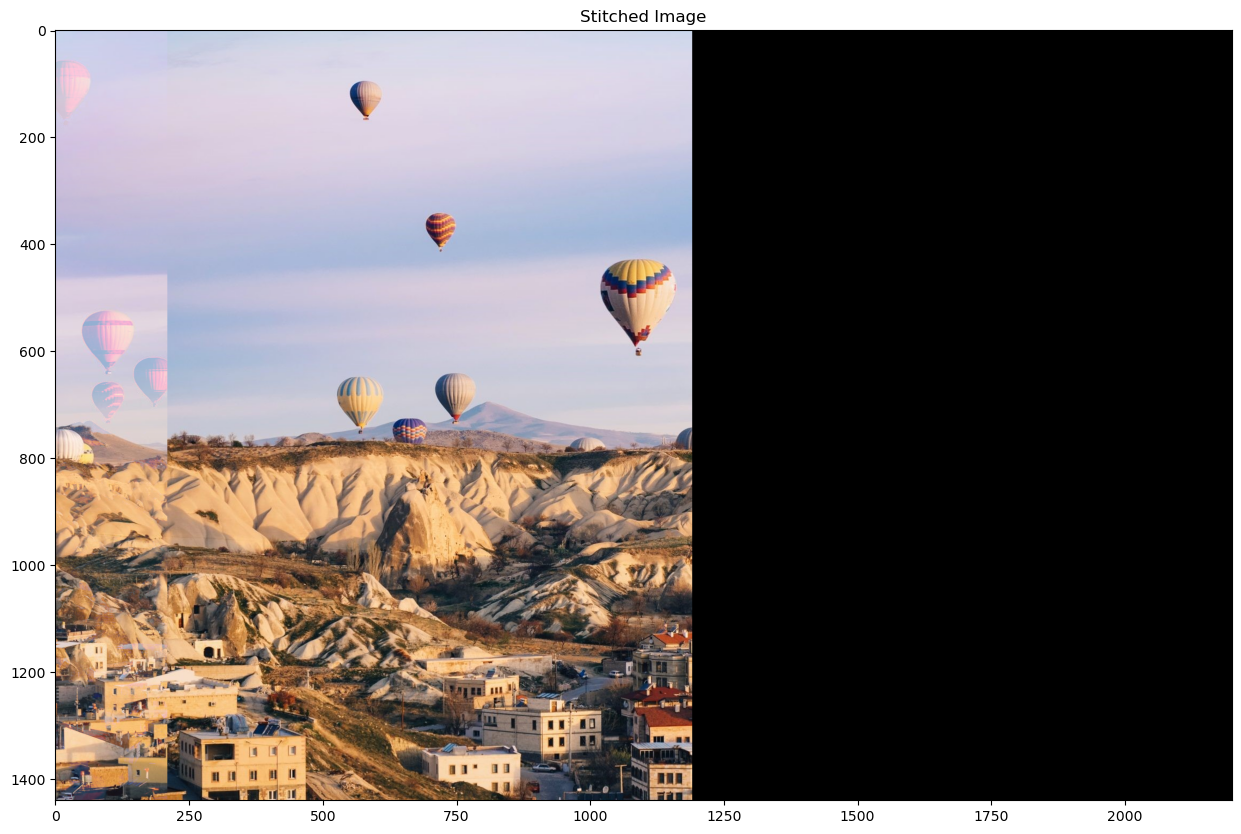

In [95]:
# Step 7: Warp img2 to img1's perspective using the homography matrix
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]

# Create a canvas large enough to accommodate both images
canvas_width = width1 + width2  # Width of the new image
canvas_height = max(height1, height2)  # Height should be large enough to fit both

# Warp img2 using the homography matrix
warped_img2 = cv2.warpPerspective(img2, H, (canvas_width, canvas_height))

# Step 8: Place img1 on the canvas
stitched_image = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)
stitched_image[0:height1, 0:width1] = img1  # Place img1 in the top-left corner

# Step 9: Combine the two images
# Since img2 is warped already, we will simply add it to the canvas
# Optionally, use np.maximum to avoid overwriting important areas
stitched_image = np.maximum(stitched_image, warped_img2)

# Step 10: Display the final stitched image
plt.figure(figsize=(20, 10))
plt.imshow(stitched_image[:, :, ::-1])  # Convert BGR to RGB
plt.title("Stitched Image")
plt.show()

In [97]:
height1

1440

In [99]:
height2

1440

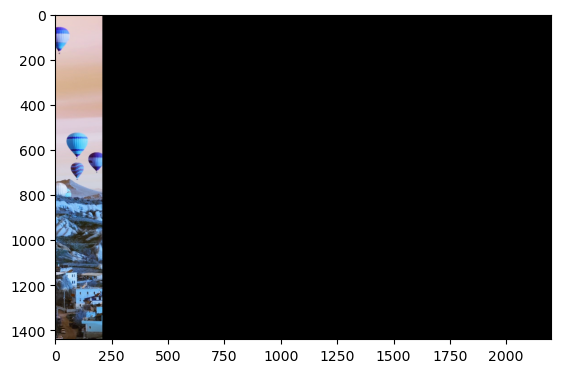

In [103]:
plt.imshow(warped_img2,cmap='gray')